***Dataset***


In this homework, we will use the New York City Airbnb Open Data. 



The goal of this homework is to create a regression model for prediction apartment prices (column 'price').



**EDA**

Load the data.

Look at the price variable. Does it have a long tail?
Features

For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365'

In [1]:
import urllib.request
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
filename = 'AB_NYC_2019.csv'
urllib.request.urlretrieve(url, filename)

('AB_NYC_2019.csv', <http.client.HTTPMessage at 0x2a21580ce50>)

In [2]:
import pandas as pd
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Question 1**


Find a feature with missing values. How many missing values does it have?

In [3]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
df[['name','host_name','last_review','reviews_per_month']].isnull().sum()

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [6]:
miss = df['name'].isnull().sum() + df['host_name'].isnull().sum() + df['last_review'].isnull().sum() + df['reviews_per_month'].isnull().sum()
miss

20141

**Question 2**


What's the median (50% percentile) for variable 'minimum_nights'?

Split the data


Shuffle the initial dataset, use seed 42.


Split your data in train/val/test sets, with 60%/20%/20% distribution.


Make sure that the target value ('price') is not in your dataframe.


Apply the log transformation to the price variable using the np.log1p() function.

In [7]:
df['minimum_nights'].median()

3.0

In [8]:
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [9]:
n = len(df)

In [11]:
n_val = int(0.2 * n) 
n_test = int(0.2 * n) 
n_train = n - (n_val + n_test) 
n_train

29337

<AxesSubplot:>

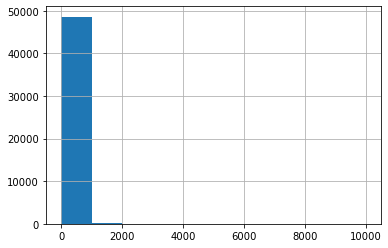

In [12]:
df["price"].hist()

In [13]:
np.random.seed(42) 
idx = np.arange(n) 
np.random.shuffle(idx) 

In [14]:
df_shuffled = df.iloc[idx] 
df_train = df_shuffled.iloc[:n_train].copy() 
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() 
df_test = df_shuffled.iloc[n_train+n_val:].copy() 

In [25]:
df_train = df_train.iloc[idx].reset_index(drop=True)
df_val = df_val.iloc[idx].reset_index(drop=True)
df_test = 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
879,317905,Come and go as you please in BKLN!,1631733,Jane,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,89,3,62,2019-01-02,0.71,1,189
44383,34205267,"Spacious, sunny room in Queens/Brooklyn",913940,Giancarlo,Queens,Ridgewood,40.70666,-73.90779,Private room,30,21,0,NaN,NaN,1,73
15394,12342297,Private bedroom in high-ceiling 4BR apartment!,19953913,Alejandro,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,120,2,17,2017-04-28,0.43,1,0
43230,33527778,Sonder | Stock Exchange | Stunning 3BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,470,2,5,2019-06-02,1.88,327,272
16332,13136376,Spacious 2 Bedroom with Balcony,16110448,Gingie,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,199,2,30,2019-06-03,0.80,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,11923007,Trendy & spacious Williamsburg Apt,7640852,Markus,Brooklyn,Williamsburg,40.71178,-73.95779,Private room,95,2,0,NaN,NaN,1,0
14661,11581737,1 Bedroom apt - near Central Park,196298,Hiershenee B.,Manhattan,Upper West Side,40.78638,-73.97004,Entire home/apt,101,30,10,2019-01-08,0.40,1,0
24515,19717723,Tiny STUDIO in EastVillage,49656804,Marija,Manhattan,East Village,40.72716,-73.98524,Entire home/apt,100,3,75,2019-07-01,3.12,1,60
31460,24489174,"Comfortable,Spacious,clean Private Room",184523531,June,Manhattan,East Harlem,40.79578,-73.94523,Private room,68,2,31,2019-06-23,2.10,1,265


In [ ]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

Question 3


We need to deal with missing values for the column from Q1.


We have two options: fill it with 0 or with the mean of this variable.


Try both options. For each, train a linear regression model without c using the code from the lessons.


For computing the mean, use the training only!


Use the validation dataset to evaluate the models and compare the RMSE of each option.


Round the RMSE scores to 2 decimal digits using round(score, 2)


Which option gives better RMSE?

In [ ]:
df.describe()

In [ ]:
df.fillna({'reviews_per_month':23.274466}, inplace=True)
df.fillna({'name':"0"}, inplace=True)
df.fillna({'host_name':"0"}, inplace=True)
df.fillna({'last_review':"0"}, inplace=True)

In [ ]:
df[['name','host_name','last_review','reviews_per_month']].isnull().sum()